<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Reading Dataframe

In [2]:
df = pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;"> Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

<center><b> No Null Records</center></b>

In [4]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [5]:
df.describe(include=['O'])

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


<b> Observations :</b><br> Doors - Imbalanced feature <br> Wheels - Imbalanced feature

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;"> Cleaning Data

<center><b>Dropping duplicate records</center></b>

In [6]:
df[df.duplicated() == True].shape

(313, 18)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df[df.duplicated() == True].shape

(0, 18)

<center><b>Dropping Features with more than 90% Imbalance in classes</b></center>

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">EDA

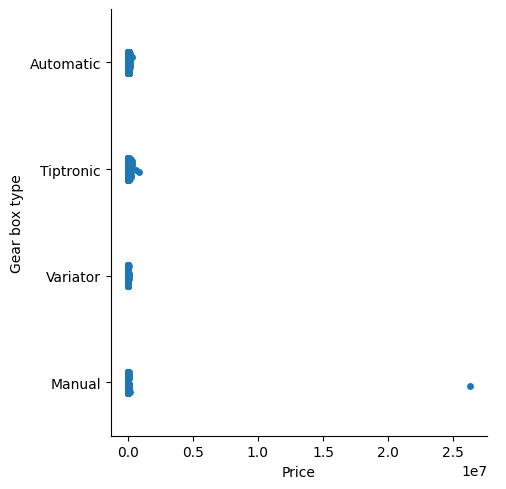

In [9]:
sns.catplot(x=df['Price'], y=df['Gear box type'])

<center>Outliers detected which are restricting from getting insights from data

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Outlier Handling

In [10]:
#Using IQR method to handle Outliers
def Outlier_counter(data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*1.5
    upper_bound = q3+IQR*1.5
    outliers = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])
    return outliers, lower_bound, upper_bound

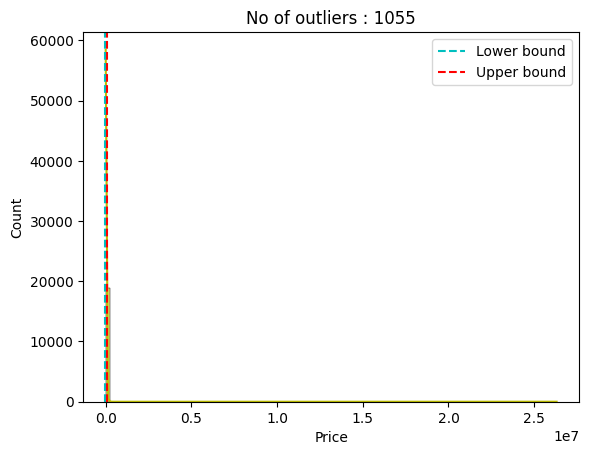

In [11]:
sns.histplot(df['Price'],color='y', kde=True, bins=100)
outliers_cnt, lb, ub = Outlier_counter(df, 'Price')
plt.title(f'No of outliers : {outliers_cnt}')
plt.axvline(lb, c='c', linestyle='--', label='Lower bound')
plt.axvline(ub, c='r', linestyle='--', label='Upper bound')
plt.legend()
plt.show()

In [12]:
def Outlier_trimmer(data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*1.5
    upper_bound = q3+IQR*1.5
    filtered_data = data[(data[col] > lower_bound) & (data[col] < upper_bound)]
    return filtered_data

In [13]:
new_df = Outlier_trimmer(df, 'Price')
new_df.shape

(17869, 18)

<Axes: xlabel='Price', ylabel='Count'>

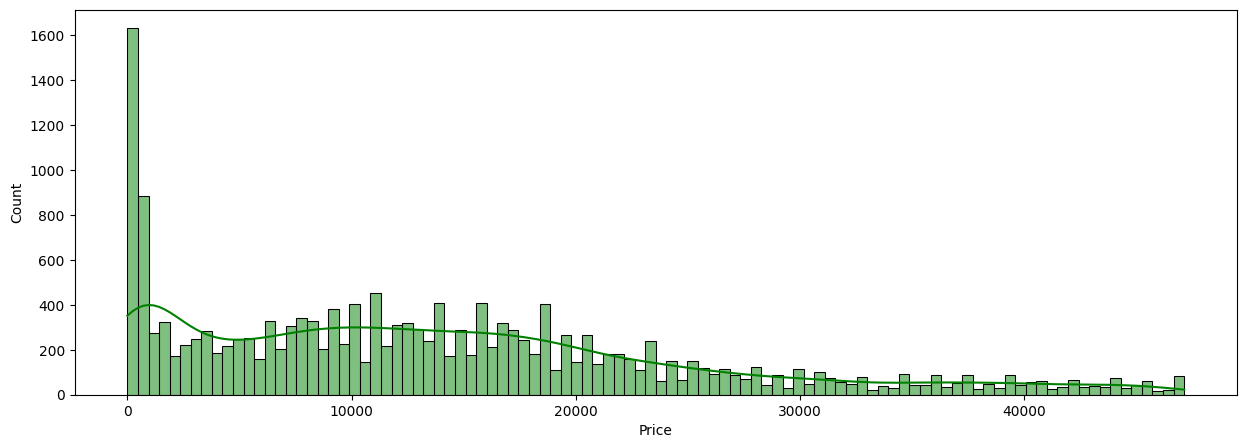

In [14]:
plt.figure(figsize=(15,5))
sns.histplot(new_df['Price'], color='g', kde=True, bins=100)

In [15]:
#checking if any imbalanced data is affected by trimming
lost = pd.DataFrame(columns=['Column', 'Old Data', 'New Data', 'Uniques Lost'])
for col in df.columns:
    diff = len(df[col].unique()) - len(new_df[col].unique())
    lost.loc[len(lost.index)] = [col, len(df[col].unique()), len(new_df[col].unique()), diff]
lost

,Column,Old Data,New Data,Uniques Lost
0,ID,18924,17869,1055
1,Price,2315,1855,460
2,Levy,559,533,26
3,Manufacturer,65,61,4
4,Model,1590,1498,92
5,Prod. year,54,52,2
6,Category,11,11,0
7,Leather interior,2,2,0
8,Fuel type,7,7,0
9,Engine volume,107,103,4


<b>we can see the columns which have very few unique values are are not getting imbalanced i.e. no elimination of particular one class is done that means those were outliers and not data of certain value in a certain feature

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">EDA (Continued)

In [16]:
new_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [17]:
#from df.describe we were able to figure out these two columns are highly imbalanced 
new_df['Doors'] = new_df['Doors'].map({'04-May':4,'02-Mar':2, '>5': '5+'})
new_df['Wheel'] = new_df['Wheel'].map({'Right-hand drive': 'Right steer','Left wheel': 'Left steer'})

C:\Users\antho\AppData\Local\Temp\ipykernel_9224\4188632352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Doors'] = new_df['Doors'].map({'04-May':4,'02-Mar':2, '>5': '5+'})
C:\Users\antho\AppData\Local\Temp\ipykernel_9224\4188632352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Wheel'] = new_df['Wheel'].map({'Right-hand drive': 'Right steer','Left wheel': 'Left steer'})


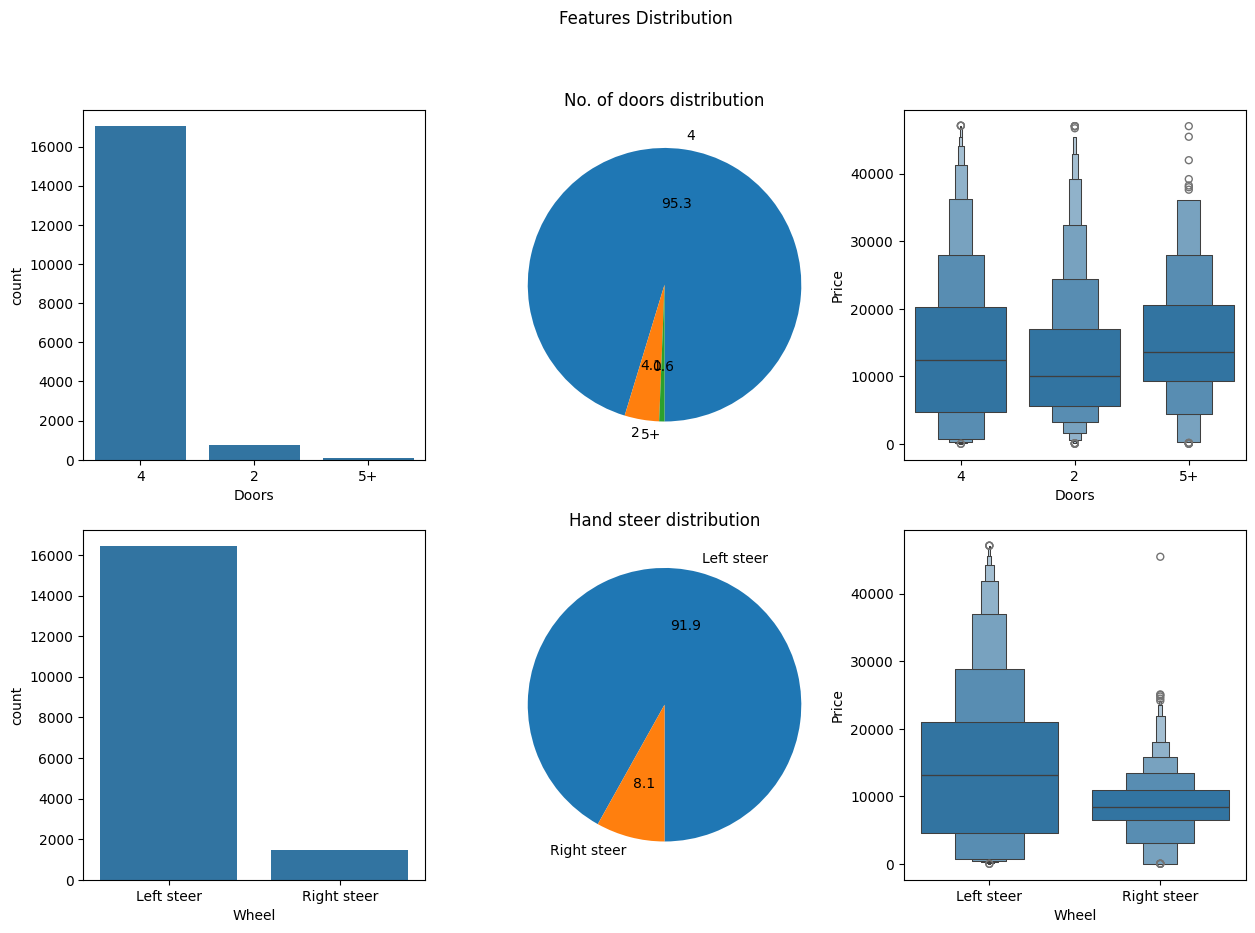

In [18]:
fig, axes = plt.subplots(2,3,figsize=(15,10))
doors_dist = new_df['Doors'].value_counts()
wheels_dist = new_df['Wheel'].value_counts()
fig.suptitle('Features Distribution')
sns.countplot(x=new_df['Doors'], ax=axes[0,0])
sns.countplot(x=new_df['Wheel'], ax=axes[1,0])
sns.boxenplot(y=new_df['Price'],x=new_df['Doors'], ax=axes[0,2])
sns.boxenplot(y=new_df['Price'],x=new_df['Wheel'], ax=axes[1,2])
axes[0,1].set_title('No. of doors distribution')
axes[0,1].pie(x=doors_dist.values,labels=doors_dist.index, autopct='%.1f',startangle=270)
axes[1,1].set_title('Hand steer distribution')
axes[1,1].pie(x=wheels_dist.values,labels=wheels_dist.index, autopct='%.1f',startangle=270)
plt.show()

<b>Conclustion:</b><br>1)The Features Wheel and Doors are highly imbalanced .<br>
2) Also the featurewise price distribution is majorly centered in the same price range making the features classes not distinct from each other, leading to have no effect to the target variable and thus dropping both the features.

In [19]:
new_df.drop(columns=['Doors', 'Wheel'], inplace=True)
new_df.head()

C:\Users\antho\AppData\Local\Temp\ipykernel_9224\3927733825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['Doors', 'Wheel'], inplace=True)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Silver,4


In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17869 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                17869 non-null  int64  
 1   Price             17869 non-null  int64  
 2   Levy              17869 non-null  object 
 3   Manufacturer      17869 non-null  object 
 4   Model             17869 non-null  object 
 5   Prod. year        17869 non-null  int64  
 6   Category          17869 non-null  object 
 7   Leather interior  17869 non-null  object 
 8   Fuel type         17869 non-null  object 
 9   Engine volume     17869 non-null  object 
 10  Mileage           17869 non-null  object 
 11  Cylinders         17869 non-null  float64
 12  Gear box type     17869 non-null  object 
 13  Drive wheels      17869 non-null  object 
 14  Color             17869 non-null  object 
 15  Airbags           17869 non-null  int64  
dtypes: float64(1), int64(4), object(11)
memory us

As seen above few columns can bee seen as numerical columns but are addressed as categorical type in .info method converting those columns to proper format

In [21]:
#extracting value which is making the 'Levy' feature object type
for unique in new_df['Levy'].unique():
    try : 
        int(unique)
    except:
        print(unique)

-


<b>Levy -</b> This column refers to any additional taxes or fees associated with the vehicle.<br>
This means the rows with '-' value refers that there is no additional tax associated with that vehicle thus we'll replace it with 0

In [22]:
new_df['Levy'] = new_df['Levy'].replace('-', 0)
new_df

C:\Users\antho\AppData\Local\Temp\ipykernel_9224\2481043151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Levy'] = new_df['Levy'].replace('-', 0)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Black,4


In [23]:
new_df['Levy'] = new_df['Levy'].astype(int)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17869 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                17869 non-null  int64  
 1   Price             17869 non-null  int64  
 2   Levy              17869 non-null  int32  
 3   Manufacturer      17869 non-null  object 
 4   Model             17869 non-null  object 
 5   Prod. year        17869 non-null  int64  
 6   Category          17869 non-null  object 
 7   Leather interior  17869 non-null  object 
 8   Fuel type         17869 non-null  object 
 9   Engine volume     17869 non-null  object 
 10  Mileage           17869 non-null  object 
 11  Cylinders         17869 non-null  float64
 12  Gear box type     17869 non-null  object 
 13  Drive wheels      17869 non-null  object 
 14  Color             17869 non-null  object 
 15  Airbags           17869 non-null  int64  
dtypes: float64(1), int32(1), int64(4), object(10)

C:\Users\antho\AppData\Local\Temp\ipykernel_9224\540604728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Levy'] = new_df['Levy'].astype(int)


<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Feature Engineering

In [24]:
#extracting value which is making the 'Engine Volume' feature object type
for unique in new_df['Engine volume'].unique():
    try : 
        float(unique)
    except:
        print(unique)

2.0 Turbo
2.2 Turbo
3.0 Turbo
1.4 Turbo
1.5 Turbo
1.6 Turbo
2.3 Turbo
2.8 Turbo
1.8 Turbo
2.4 Turbo
3.5 Turbo
3.2 Turbo
1.3 Turbo
2.5 Turbo
1.9 Turbo
0.2 Turbo
4.8 Turbo
1.2 Turbo
1.7 Turbo
4.6 Turbo
2.7 Turbo
2.9 Turbo
4.4 Turbo
3.7 Turbo
2.1 Turbo
0.7 Turbo
0.6 Turbo
5.5 Turbo
3.6 Turbo
1.0 Turbo
4.7 Turbo
4.5 Turbo
0.8 Turbo
4.2 Turbo
5.0 Turbo
6.3 Turbo
5.4 Turbo
0.3 Turbo
1.1 Turbo


We can create two features <br>
1)"Engine Volume" which contains just the engine volume <br>
2)"Turbo" can be a binary feature determining the presence of Turbo(yes/no)

In [25]:
def eng_vol_handler():
    turbos = list()
    values = list()
    for val in new_df['Engine volume']:
        try : 
            val = float(val)
            turbo = 'No'
        except:
            val = val.split(' ')[0]
            turbo = 'Yes'
        turbos.append(turbo)
        values.append(val)
    return turbos,values

In [26]:
new_df['Turbo'], new_df['Engine Volume']= eng_vol_handler()
new_df


C:\Users\antho\AppData\Local\Temp\ipykernel_9224\1628160223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Turbo'], new_df['Engine Volume']= eng_vol_handler()
C:\Users\antho\AppData\Local\Temp\ipykernel_9224\1628160223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Turbo'], new_df['Engine Volume']= eng_vol_handler()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Silver,12,No,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Black,8,No,3.0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Black,2,No,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,White,0,No,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Silver,4,No,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Silver,5,Yes,2.0
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Red,8,No,2.4
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Grey,4,No,2.0
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Black,4,No,2.0


In [27]:
#now we can drop the old 'Engine volume variable
new_df.drop(columns=['Engine volume'], inplace=True)
new_df

C:\Users\antho\AppData\Local\Temp\ipykernel_9224\1101128518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['Engine volume'], inplace=True)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005 km,6.0,Automatic,4x4,Silver,12,No,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000 km,6.0,Tiptronic,4x4,Black,8,No,3.0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000 km,4.0,Variator,Front,Black,2,No,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966 km,4.0,Automatic,4x4,White,0,No,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901 km,4.0,Automatic,Front,Silver,4,No,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,300000 km,4.0,Manual,Rear,Silver,5,Yes,2.0
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600 km,4.0,Tiptronic,Front,Red,8,No,2.4
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365 km,4.0,Automatic,Front,Grey,4,No,2.0
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258 km,4.0,Automatic,Front,Black,4,No,2.0


In [28]:
# Mileage feature contains km at the end which makes the feature object type removing 'km' from the records can make it numerical feature
def mileage_handler(val):
    val = int(val[:-2].strip())
    return val

In [29]:
new_df['Mileage']= new_df['Mileage'].apply(mileage_handler)
new_df

C:\Users\antho\AppData\Local\Temp\ipykernel_9224\925275603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Mileage']= new_df['Mileage'].apply(mileage_handler)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,Silver,12,No,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,Black,8,No,3.0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,Black,2,No,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,White,0,No,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,Silver,4,No,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,300000,4.0,Manual,Rear,Silver,5,Yes,2.0
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600,4.0,Tiptronic,Front,Red,8,No,2.4
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365,4.0,Automatic,Front,Grey,4,No,2.0
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258,4.0,Automatic,Front,Black,4,No,2.0


In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17869 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                17869 non-null  int64  
 1   Price             17869 non-null  int64  
 2   Levy              17869 non-null  int32  
 3   Manufacturer      17869 non-null  object 
 4   Model             17869 non-null  object 
 5   Prod. year        17869 non-null  int64  
 6   Category          17869 non-null  object 
 7   Leather interior  17869 non-null  object 
 8   Fuel type         17869 non-null  object 
 9   Mileage           17869 non-null  int64  
 10  Cylinders         17869 non-null  float64
 11  Gear box type     17869 non-null  object 
 12  Drive wheels      17869 non-null  object 
 13  Color             17869 non-null  object 
 14  Airbags           17869 non-null  int64  
 15  Turbo             17869 non-null  object 
 16  Engine Volume     17869 non-null  object 
dty

In [31]:
numeric_features = list()
for col in new_df.columns:
    col_dtype = new_df[col].dtype
    if col_dtype != 'object':
        numeric_features.append(col)
numeric_features.pop(1)
numeric_features

['ID', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags']

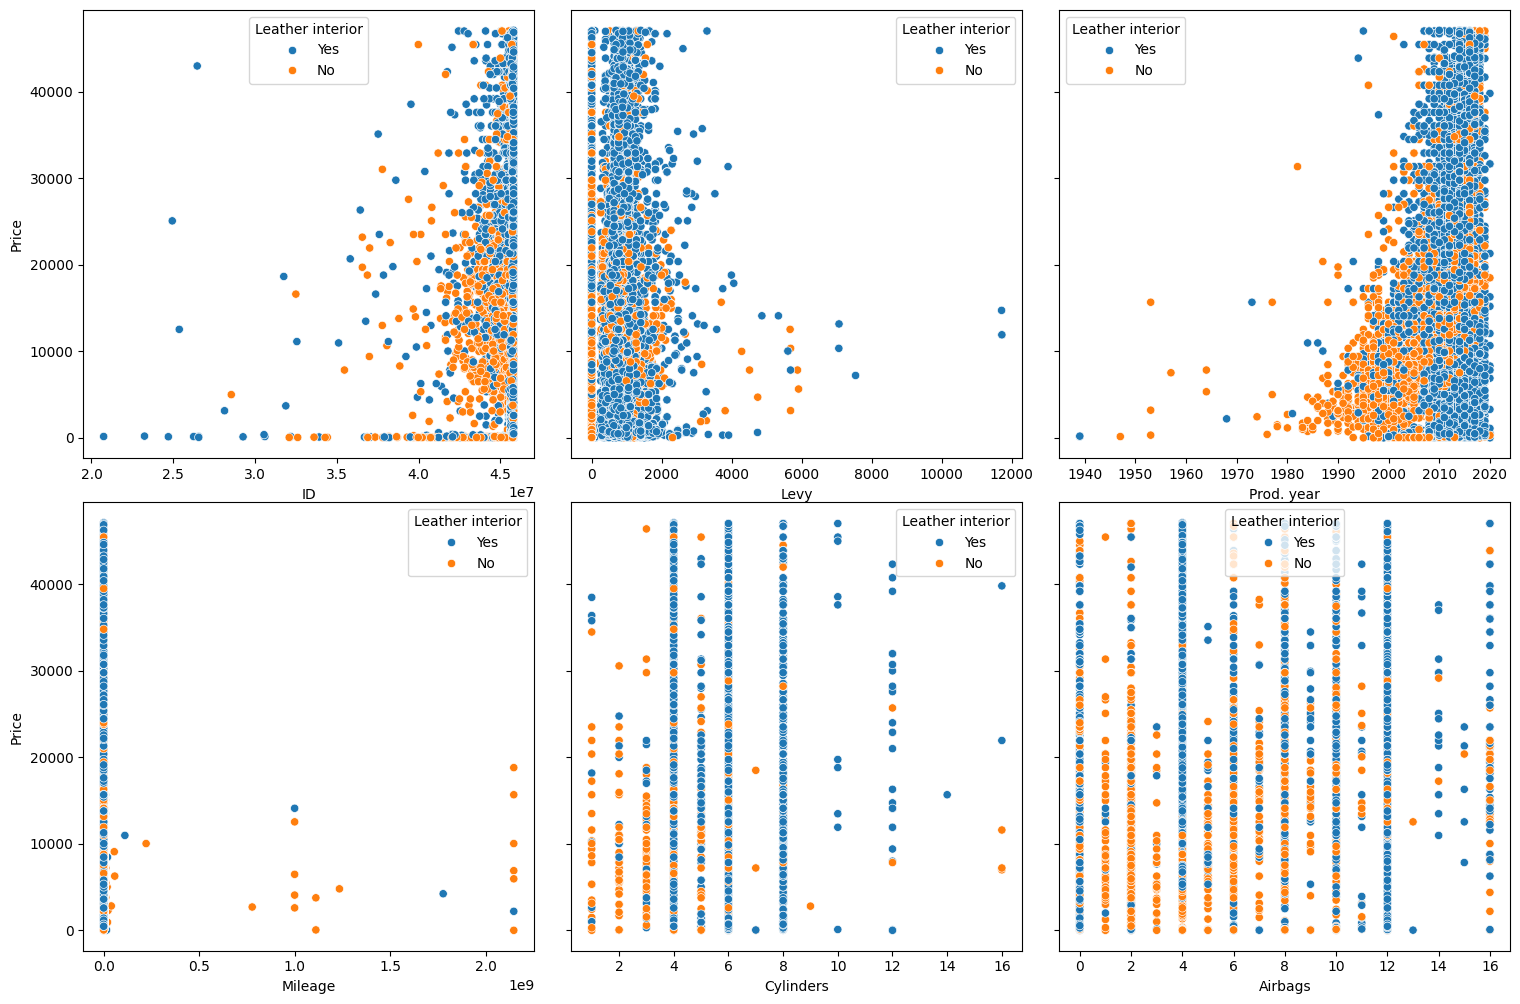

In [32]:
# now we can plot the numerical features and see their correlation with the target feature
fig, axes = plt.subplots(2, 3, figsize=(15,10), sharey='all')
fig.tight_layout() 
current_col = 0
for i in range(2):
    for j in range(3):
        try:
            sns.scatterplot(x=new_df[numeric_features[current_col]], y=new_df['Price'],hue=new_df['Leather interior'], ax=axes[i,j])
            current_col+=1
        except:
            pass
plt.show()

<b>Observation - </b>
<br>1)Clear outliers can be detected in Mileage, Levy, Cylinders and Production yr but in Mileage, Levy, Production yr features the Price range shared among the outliers is some specific price range which can be advantageous for making predictions while Cylinders feature has very few outliers and outliers seem to have high variance which can hinder the efficiency of the model.<br><b>Conclusion - </b>
<br>1)The ID feature shows correlation i.e. when the IDs are low the the price of the car is also on the lower side
<br>➤If we wouldve known on what basis the IDs have been assigned :<br>
&emsp;&emsp;✦We must check if the data is not sorted as per IDs, which can affect the data if splitted without shhuffling<br>
➤But since we dont know and supposing IDs are assigned as per the order of scrapping .<br>
&emsp;&emsp;✦We will drop the feature as it will lead the model to misinterpret prices affected by the IDs.<br>
2) The Price of a car is influenced by its year of production to a great extent, also when the production year is relatively on the newer side and price is low, its mostly when the car doesnt have leather interior (This will help to improve efficiency of the model).<br>
3) Dropping outliers based on Levy feature can be kept into consideration if the model is not performing well.

In [33]:
new_df.drop(columns=['ID'],inplace=True)
print(new_df.shape)
new_df.sample(7)

(17869, 16)


C:\Users\antho\AppData\Local\Temp\ipykernel_9224\3234964296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['ID'],inplace=True)


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
7714,24462,777,TOYOTA,Camry,2014,Sedan,Yes,Petrol,108000,4.0,Tiptronic,Front,Black,10,No,2.5
16250,43905,1202,HYUNDAI,Santa FE sport,2017,Jeep,No,Petrol,72000,4.0,Tiptronic,4x4,Black,12,No,2.4
2297,3293,475,FIAT,500,2012,Hatchback,Yes,Petrol,157317,4.0,Automatic,Front,Red,12,No,1.4
7001,40688,1091,HYUNDAI,H1,2016,Universal,Yes,Diesel,135206,4.0,Automatic,Front,White,4,No,2.5
4729,31988,1935,LEXUS,GX 460,2016,Jeep,Yes,Petrol,155976,8.0,Automatic,4x4,White,0,No,4.6
10998,10506,1533,CHEVROLET,Traverse,2016,Jeep,Yes,Petrol,91822,6.0,Automatic,4x4,White,12,No,3.6
13759,19757,0,HYUNDAI,Veloster,2016,Hatchback,Yes,Petrol,31000,4.0,Tiptronic,Front,Silver,6,Yes,1.6


In [34]:
# organizing value counts in a way they are easy to visualize
vc =new_df['Fuel type'].value_counts()
fuel_vc =  dict()
for i in range(len(new_df['Fuel type'].value_counts())):
    if len(vc)%2 != 0:
        if i == 0 :
            fuel_vc[vc.index[i]] = vc.values[i]
        elif vc.values[i] == vc.values[-i]:
            fuel_vc[vc.index[i]] = vc.values[i]
            break
        else :
            fuel_vc[vc.index[i]] = vc.values[i]
            fuel_vc[vc.index[-i]] = vc.values[-i]

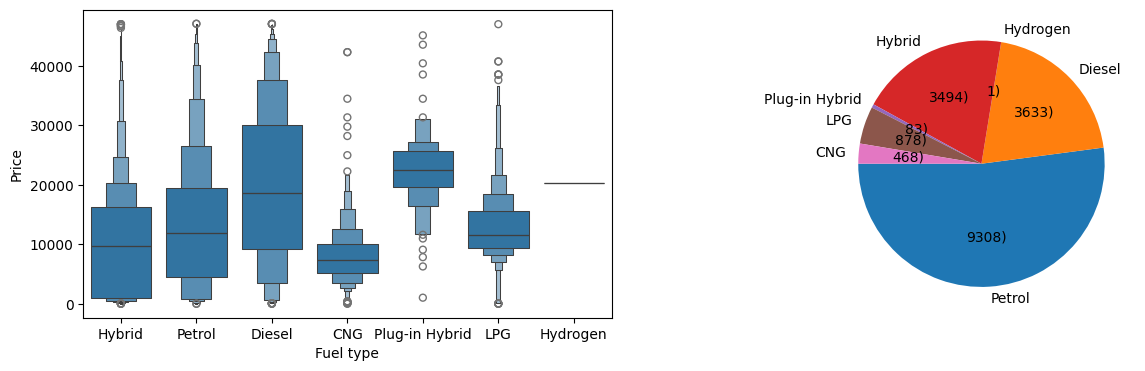

In [35]:
#now we'll see which coloured car is mostly preferred and also their relation with target feature
fig, axes = plt.subplots(1,2,figsize=(15,4))
sns.boxenplot(y=new_df['Price'],x=new_df['Fuel type'], ax=axes[0])
axes[1].pie(x=list(fuel_vc.values()),labels=list(fuel_vc.keys()),autopct=lambda pct: f"{int(pct/100.*sum(fuel_vc.values()))})",startangle=180)
plt.show()

Observations:

1. Price Distribution:<br>
✦Diesel and Plug-in Hybrid vehicles have the highest mean and median prices, suggesting they are generally more expensive.<br>
✦CNG vehicles have the lowest mean and median prices, indicating they are typically the most affordable option.<br>
✦There's a significant gap between the most expensive (Plug-in Hybrid) and least expensive (CNG) fuel types.<br>
2. Price Skewness:<br>
✦For most fuel types, the mean is higher than the median, suggesting a right-skewed distribution (some high-priced vehicles pulling the average up).<br>
✦This skew is most pronounced in Petrol vehicles, with a larger difference between mean and median.<br>
3. Popularity:<br>
✦Petrol vehicles are by far the most common, making up the majority of the dataset (9,309 vehicles).<br>
✦Hybrid and Diesel vehicles are the next most common, with similar counts (3,495 and 3,634 respectively).<br>
✦Alternative fuel types (CNG, LPG, Plug-in Hybrid, Hydrogen) are much less common.<br>
4. Rare Fuel Types:<br>
✦Hydrogen vehicles are extremely rare in this dataset, with only 1 entry.<br>
✦Plug-in Hybrids are also relatively uncommon, with only 83 entries.<br>
5. Price Ranges:<br>
✦Traditional fuel types (Petrol, Diesel) occupy the middle price range.<br>
✦Alternative fuel types show more variation, from the cheapest (CNG) to some of the most expensive (Plug-in Hybrid, Hydrogen).<br>
6. Hybrid Pricing:<br>
✦Regular Hybrids are priced lower than conventional Petrol and Diesel vehicles on average.<br>
✦Plug-in Hybrids, however, are significantly more expensive than regular Hybrids.<br>
7. Sample Size Considerations:<br>
✦The low count for Hydrogen vehicles (just 1) means its price data is not statistically significant.<br>
✦The small sample size for Plug-in Hybrids (83) suggests their price data might be less reliable than for more common fuel types.<br>

Conclusion:<br>
We can group the fuel types 'Plug-in Hybrid' and 'Hydrogen' into a single category called 'Other' for several reasons:

1. Price range similarity: These fuel types share a similar price range in our dataset.
2. Low representation: Together, they account for less than 0.5% of the total records (1 Hydrogen and 83 Plug-in Hybrid vehicles out of the total dataset).
3. Model impact: Given their small representation, combining these categories is unlikely to significantly impact our model's performance.
4. Simplification: This grouping will simplify our analysis without sacrificing meaningful information.

By consolidating these less common fuel types, we can streamline our data while maintaining the integrity of our model and analysis.

In [36]:
new_df.replace({'Plug-in Hybrid':'Other', 'Hydrogen': 'Other'}, inplace=True)
new_df['Fuel type'].value_counts()

C:\Users\antho\AppData\Local\Temp\ipykernel_9224\2868692110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace({'Plug-in Hybrid':'Other', 'Hydrogen': 'Other'}, inplace=True)


Fuel type
Petrol    9309
Diesel    3634
Hybrid    3495
LPG        878
CNG        469
Other       84
Name: count, dtype: int64

In [37]:
new_df.sample(7)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
132,549,2866,NISSAN,Maxima,2004,Sedan,Yes,Petrol,299709,6.0,Automatic,Front,Grey,12,No,3.5
9440,10945,1185,HYUNDAI,H1,2009,Minivan,Yes,Diesel,85678,4.0,Automatic,Front,Silver,4,No,2.5
2522,35005,1091,HYUNDAI,H1,2016,Minivan,Yes,Diesel,113293,4.0,Automatic,Front,White,4,No,2.5
14540,60,0,HYUNDAI,Accent,2012,Sedan,No,Petrol,150000,4.0,Manual,Front,Silver,8,No,1.4
5083,10976,0,JEEP,Grand Cherokee,2004,Jeep,Yes,Petrol,140800,8.0,Automatic,4x4,Blue,6,No,4.7
13049,30,0,OPEL,Astra,1998,Hatchback,No,Petrol,200000,4.0,Manual,4x4,Black,12,No,1.8
1942,6868,836,CHEVROLET,Cruze,2010,Sedan,Yes,Diesel,47221,4.0,Automatic,Front,Black,4,No,2.0


C:\Users\antho\AppData\Local\Temp\ipykernel_9224\2613311352.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


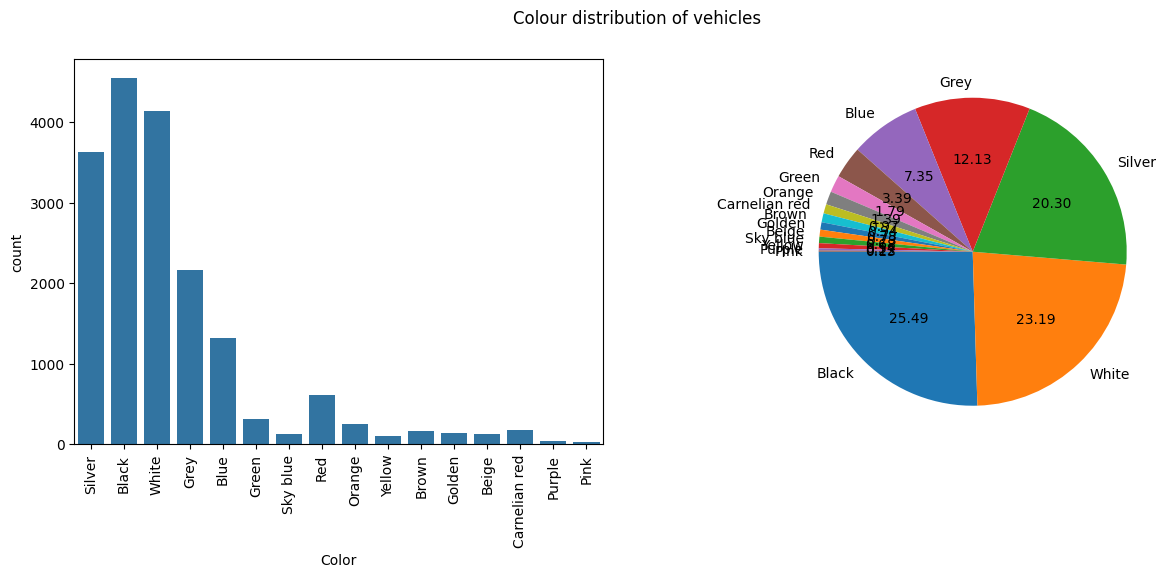

In [38]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x=new_df['Color'], ax=axes[0])
colors_vc = new_df['Color'].value_counts()
fig.suptitle('Colour distribution of vehicles')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].pie(x=colors_vc.values, labels=colors_vc.index, autopct='%.2f',
            startangle=180)
plt.show()

Observation :
The distribution of colours is uneven, few colours share a very small proportion of the distribution.

Conclusion :
We can group the colours sharing less then 1% length of the entire data as Others, as the colour has a very less correlation with our target variable .

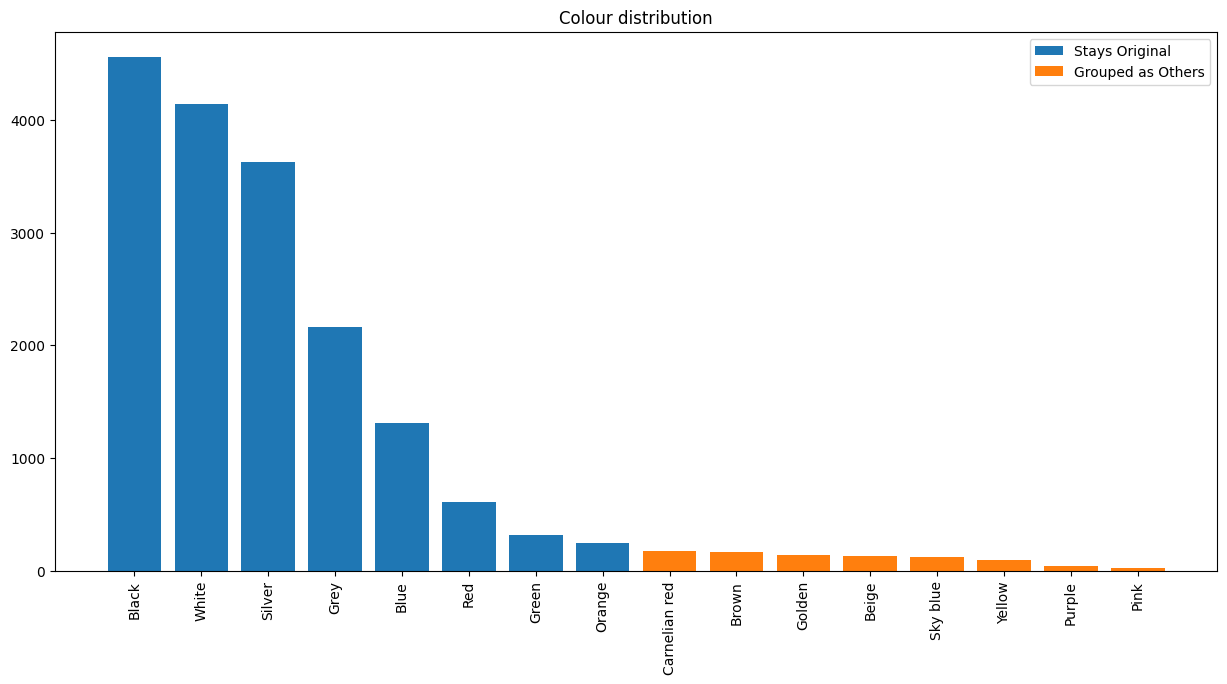

In [39]:
vc =new_df['Color'].value_counts()
min_counts = len(new_df['Color'])/100 #1% of data length
color_vc =  dict()
color_vc_full = dict()

for i in range(len(vc)):
    if vc.values[i] < min_counts:
        color_vc[vc.index[i]] = vc.values[i]
        color_vc_full[vc.index[i]] = 0
    else:
        color_vc[vc.index[i]] = 0
        color_vc_full[vc.index[i]] = vc.values[i]

plt.figure(figsize=(15,7))
plt.bar(range(len(color_vc_full)), list(color_vc_full.values()), align='center')
plt.bar(range(len(color_vc)), list(color_vc.values()), align='center')
plt.xticks(range(len(color_vc)), list(color_vc.keys()),rotation=90)
plt.legend(['Stays Original','Grouped as Others'])
plt.title('Colour distribution')
plt.show()

In [40]:
for key, val in color_vc_full.items():
    if color_vc_full[key] == 0:
        color_vc_full[key] = 'Others'
    else:
        color_vc_full[key] = key

new_df['Color'] = new_df['Color'].map(color_vc_full)
new_df['Color'].unique()

C:\Users\antho\AppData\Local\Temp\ipykernel_9224\594317988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Color'] = new_df['Color'].map(color_vc_full)


array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Others',
       'Red', 'Orange'], dtype=object)

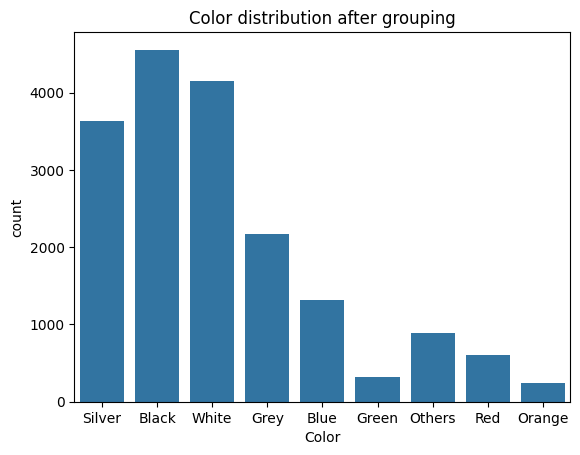

In [45]:
plt.title('Color distribution after grouping')
sns.countplot(x=new_df['Color'])
plt.show()

In [46]:
new_df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,Silver,4,No,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,300000,4.0,Manual,Rear,Silver,5,Yes,2.0
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600,4.0,Tiptronic,Front,Red,8,No,2.4
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365,4.0,Automatic,Front,Grey,4,No,2.0
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258,4.0,Automatic,Front,Black,4,No,2.0


In [78]:
result = new_df.groupby(['Drive wheels', 'Leather interior', 'Turbo'])['Price'].mean().unstack(fill_value=0).unstack(fill_value=0)
result

Turbo                       No                         Yes              
Leather interior            No           Yes            No           Yes
Drive wheels                                                            
4x4               14876.478049  11110.776366  16521.103704  25313.514523
Front             12155.139342  15188.221009  14190.953086  18937.648571
Rear               9283.865462  11395.843722  18049.627193  25760.616438

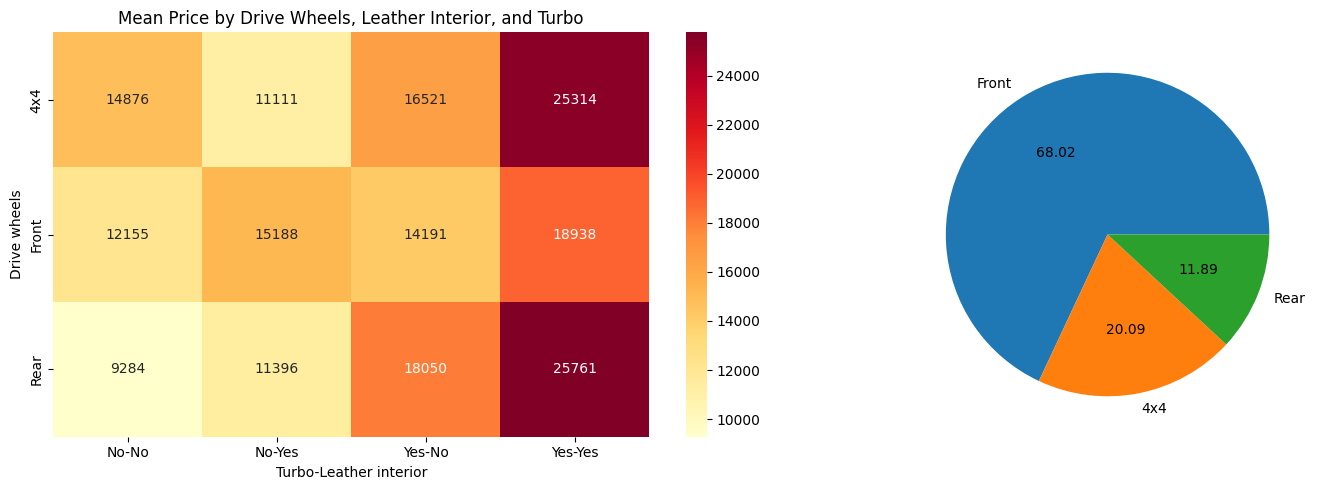

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2,figsize=(15, 5))
axes[1].pie(x=vc.values, labels=vc.index, autopct='%.2f')
sns.heatmap(result, annot=True, cmap="YlOrRd", fmt=".0f", ax=axes[0])
axes[0].set_title("Mean Price by Drive Wheels, Leather Interior, and Turbo")
plt.tight_layout()
plt.show()

Observation -
1. The Drive wheels categories are not imbalanced each category has good distribution .
2. The prices are generally on the higher side when The car has Turbo and Leather interior, and on the lower side when any one or both or them are absent.

Conclusion -<br>
The Drive wheels features needs to be One hot encoded only, no other changes are required.

In [85]:
new_df.sample(5)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
6031,1500,0,VAZ,2121 (Niva),1995,Jeep,No,CNG,0,4.0,Manual,4x4,Red,0,No,1.7
12109,17876,0,VOLKSWAGEN,Jetta,2013,Sedan,Yes,Hybrid,115200,4.0,Tiptronic,Front,Grey,0,No,1.4
1990,15681,1811,LEXUS,GX 460,2010,Jeep,Yes,Petrol,275240,8.0,Automatic,4x4,Silver,0,No,4.6
7727,5959,638,DAIHATSU,Move,2012,Hatchback,No,Petrol,71000,3.0,Automatic,Front,Others,4,No,0.7
3377,30,0,HONDA,FIT,2010,Hatchback,No,Petrol,0,4.0,Automatic,Front,White,4,No,1.3


In [86]:
new_df['Gear box type'].describe()

count         17869
unique            4
top       Automatic
freq          12593
Name: Gear box type, dtype: object

In [97]:
new_df['Turbo_Leather'] = new_df['Turbo'] + ' Turbo, ' + new_df['Leather interior'] + ' Leather'

C:\Users\antho\AppData\Local\Temp\ipykernel_9224\3170478138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Turbo_Leather'] = new_df['Turbo'] + ' Turbo, ' + new_df['Leather interior'] + ' Leather'


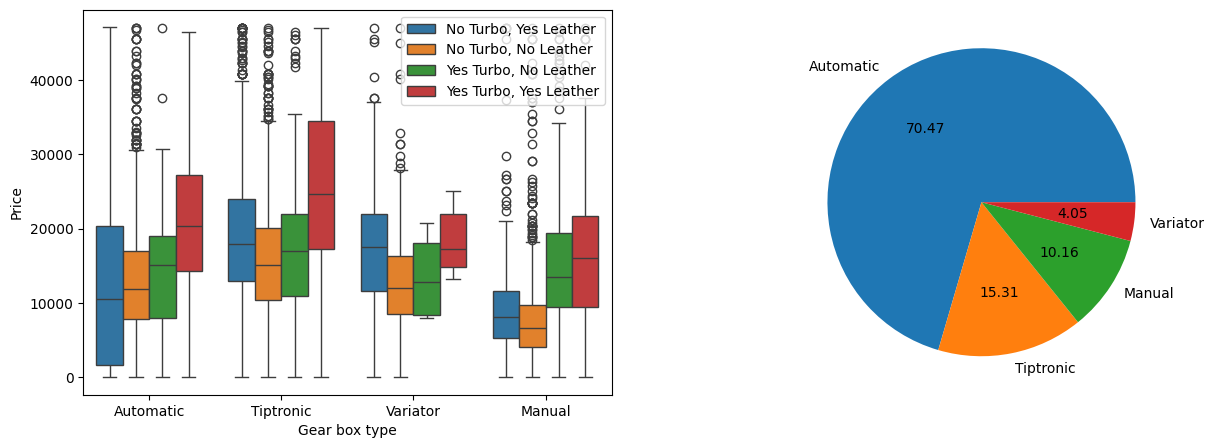

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x='Gear box type', y='Price', hue='Turbo_Leather', data=new_df,ax=axes[0])
gbt_vc = new_df['Gear box type'].value_counts()
axes[1].pie(labels=gbt_vc.index, x=gbt_vc.values, autopct='%.2f')
axes[0].legend(loc='upper right')
plt.show() 

Observation - 
1. The data is imbalanced, majority distribution is occupied by 'Automatic' - Gear box type but all types share good amount of data.

Conclusion
There is no need of doing other changes than one hot encoding

In [126]:
new_df.drop(columns=['Turbo_Leather'], inplace=True)
new_df

C:\Users\antho\AppData\Local\Temp\ipykernel_9224\1622652803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['Turbo_Leather'], inplace=True)


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,Silver,4,No,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,300000,4.0,Manual,Rear,Silver,5,Yes,2.0
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600,4.0,Tiptronic,Front,Red,8,No,2.4
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365,4.0,Automatic,Front,Grey,4,No,2.0
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258,4.0,Automatic,Front,Black,4,No,2.0


In [133]:
new_df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

C:\Users\antho\AppData\Local\Temp\ipykernel_9224\3209246703.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


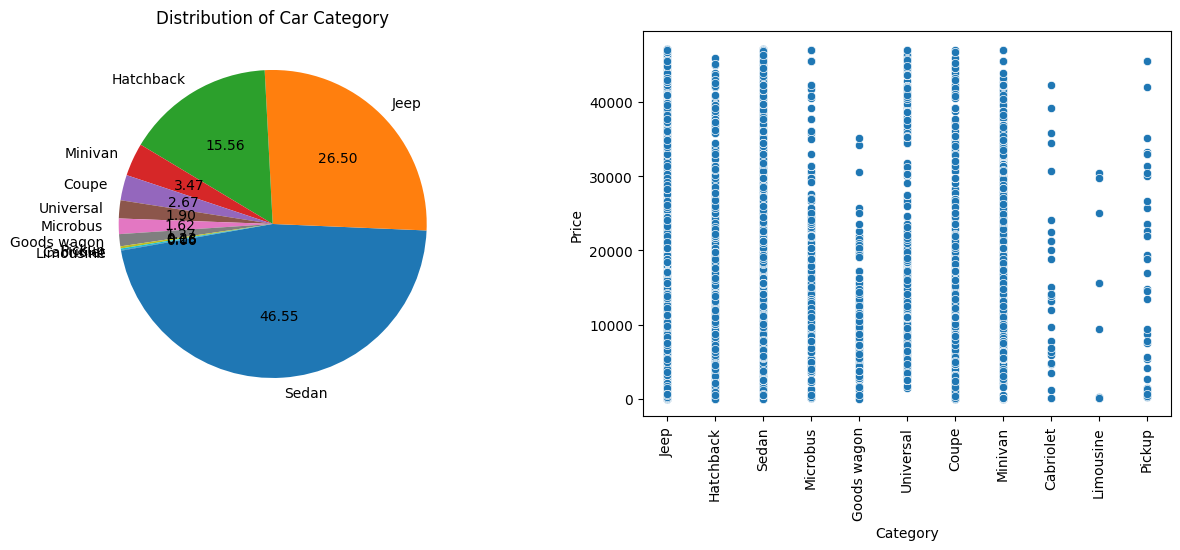

In [146]:
cat_vc = new_df['Category'].value_counts()
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].set_title('Distribution of Car Category')
axes[0].pie(x=cat_vc.values, labels=cat_vc.index, autopct='%.2f', startangle=190)
sns.scatterplot(x=new_df['Category'], y=new_df['Price'], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
plt.show()

Observation :
There exists some categories of cars which have very less share in the distribution including Pickup,Cabriolet and Limousine.

Conclusion :
We will have to group the categories with less than 1% records as Others because the model will make poor predictions on this data.

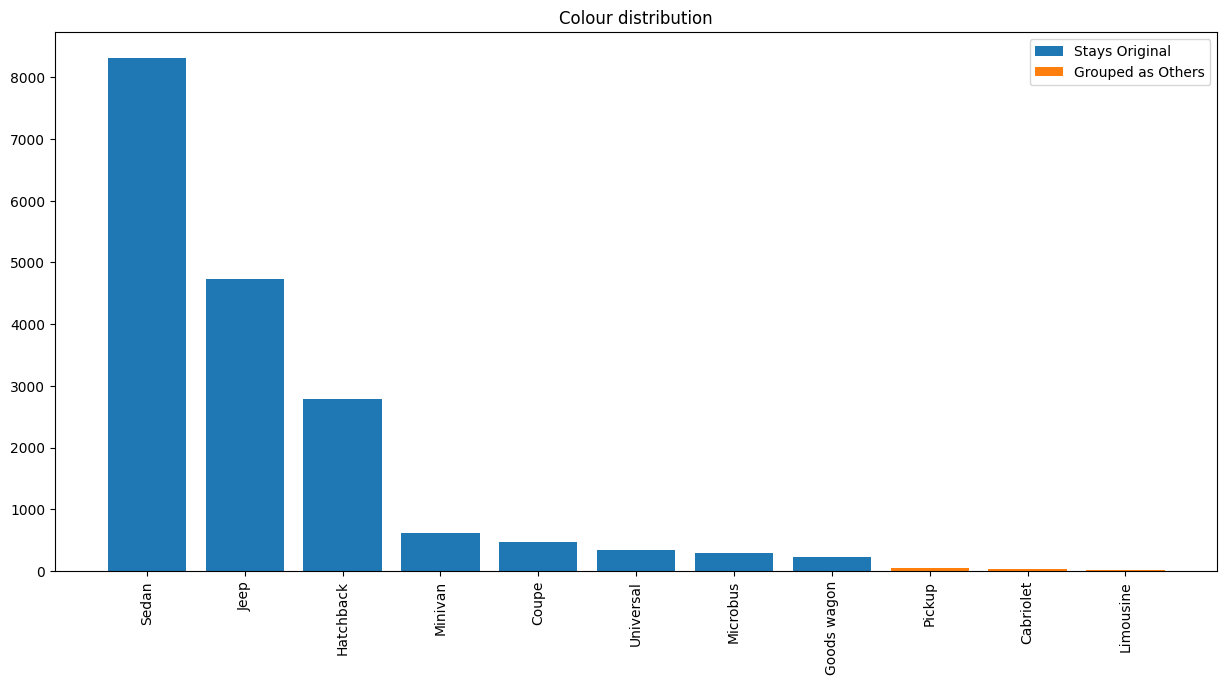

In [148]:
vc =new_df['Category'].value_counts()
min_counts = len(new_df['Category'])/100 #1% of data length
cat_vc =  dict()
cat_vc_full = dict()

for i in range(len(vc)):
    if vc.values[i] < min_counts:
        cat_vc[vc.index[i]] = vc.values[i]
        cat_vc_full[vc.index[i]] = 0
    else:
        cat_vc[vc.index[i]] = 0
        cat_vc_full[vc.index[i]] = vc.values[i]

plt.figure(figsize=(15,7))
plt.bar(range(len(cat_vc_full)), list(cat_vc_full.values()), align='center')
plt.bar(range(len(cat_vc)), list(cat_vc.values()), align='center')
plt.xticks(range(len(cat_vc)), list(cat_vc.keys()),rotation=90)
plt.legend(['Stays Original','Grouped as Others'])
plt.title('Colour distribution')
plt.show()

In [149]:
for key, val in cat_vc_full.items():
    if cat_vc_full[key] == 0:
        cat_vc_full[key] = 'Others'
    else:
        cat_vc_full[key] = key

new_df['Category'] = new_df['Category'].map(cat_vc_full)
new_df['Category'].unique()

C:\Users\antho\AppData\Local\Temp\ipykernel_9224\2301073742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Category'] = new_df['Category'].map(cat_vc_full)


array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Others'], dtype=object)

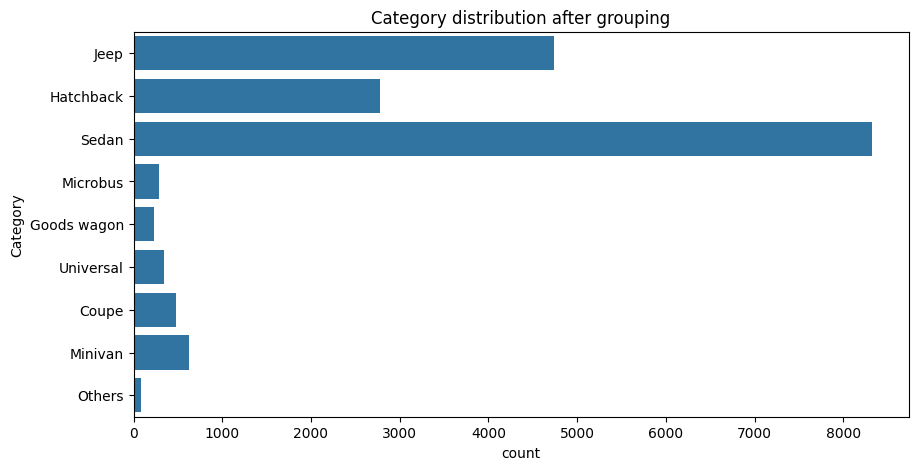

In [157]:
plt.figure(figsize=(10,5))
plt.title('Category distribution after grouping')
sns.countplot(y=new_df['Category'])
plt.show()